# What is Churn?
Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

# Customer Churn include:
    - cancel a service that is under contract
    - cancel a service that is not under contract
    - expire a credit card
    - purchase from a different store
    ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
telco = pd.read_csv('Churn.csv')

# Exploratory Data Analysis

In [3]:
telco.info() #check out the structure and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [4]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [5]:
print(telco.groupby(['Churn']).mean()) #compute the means for each column after grouped by Churn

       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  \
Churn                                                                      
no         100.793684       8.604561  175.175754  199.043298  200.133193   
yes        102.664596       5.115942  206.914079  212.410145  205.231677   

       Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  \
Churn                                                                  
no     10.158877        1.449825  100.283158   29.780421  100.038596   
yes    10.700000        2.229814  101.335404   35.175921  100.561077   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no      16.918909   100.058246      9.006074    4.532982     2.743404   
yes     18.054969   100.399586      9.235528    4.163561     2.889545   

        Area_Code  
Churn              
no     437.074737  
yes    437.817805  


In [6]:
print(telco.groupby(['Churn']).std()) #compute the standard deviations for each column after grouped by Churn

       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  \
Churn                                                                    
no           39.88235      13.913125  50.181655  50.292175   51.105032   
yes          39.46782      11.860138  68.997792  51.728910   47.132825   

       Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  \
Churn                                                                
no      2.784489        1.163883  19.801157    8.530835  19.958414   
yes     2.793190        1.853275  21.582307   11.729710  19.724711   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no       4.274863    19.506246      2.299768    2.441984     0.751784   
yes      4.396762    19.950659      2.121081    2.551575     0.754152   

       Area_Code  
Churn             
no     42.306156  
yes    42.792270  


In [7]:
print(telco.groupby('State')['Churn'].value_counts()) #Churn & NotChurn per State

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


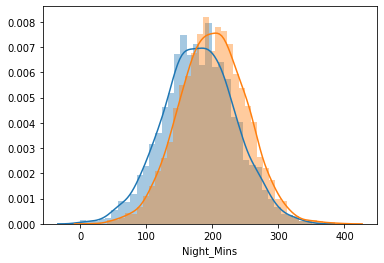

In [8]:
sns.distplot(telco['Day_Mins'])
sns.distplot(telco['Night_Mins'])
plt.show() #compare 2 distributions of 2 features

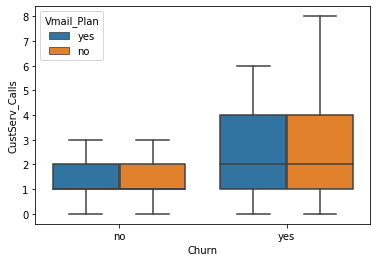

In [9]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "", #remove outliers
        hue = "Vmail_Plan") #add 3rd variable
plt.show()

# Preprocessing for Modeling
- identify features to convert: Churn, Vmail_plan
- encode binary features
- one hot encoding
- feature scaling

In [10]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [11]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})

In [12]:
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head()) #print to verify

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [13]:
telco_state = pd.get_dummies(telco['State']) #apply indicator variables to State

In [14]:
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  WA  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   WI  WV  WY  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 51 columns]


In [15]:
telco_intl = pd.get_dummies(telco['Intl_Plan']) #get indicators for 'Intl_Plan'

In [16]:
telco_intl.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [17]:
telco = telco.drop(['State', 'Phone', 'Intl_Plan'], axis = 1)

In [18]:
telco = telco.append(telco_state)

/Users/Kainan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [19]:
telco = telco.append(telco_intl)

In [20]:
#telco.info()

In [21]:
telco_intl.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [22]:
telco['Intl_Calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Intl_Calls, dtype: float64

In [23]:
telco['Night_Mins'].describe() #needs re-scaling

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Night_Mins, dtype: float64

In [24]:
telco_scale = telco[['Intl_Calls', 'Night_Mins']]

In [25]:
telco_scaled = StandardScaler().fit_transform(telco_scale)

In [26]:
telco_scaled.shape

(9999, 2)

In [27]:
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"]) # add column name back

In [28]:
telco_scaled_df.describe()

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-1.459062e-16,6.602046e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


In [29]:
telco = telco.append(telco_scaled_df)

/Users/Kainan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [30]:
telco = telco.drop(['Area_Code'], axis = 1)

In [31]:
#telco.info()
telco.rename(columns={'no':'Intl_no', 'yes':'Intl_yes'}, inplace = True) #update column names..

In [32]:
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']

In [33]:
telco['Avg_Night_Calls'].head()

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64

# Churn Prediction
- Random Forest & Accuracy Score
- Confustion Matrix
- Precision & Recall
- ROC Curve & AUC
- F1 score

In [34]:
#from sklearn.linear_model import LogisticRegression

In [35]:
# Instantiate the classifier
#clf = LogisticRegression()

In [36]:
telco = pd.DataFrame(telco).fillna(0)
#features = list(telco.columns)

In [37]:
#telco.info()

In [38]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
len(X_train)

13998

In [40]:
X_test.shape

(6000, 70)

In [41]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.9835


/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
y_pred = clf.predict(X_test)
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[5851    7]
 [  92   50]]


In [43]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the recall
print(precision_score(y_test, y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.8771929824561403
0.352112676056338


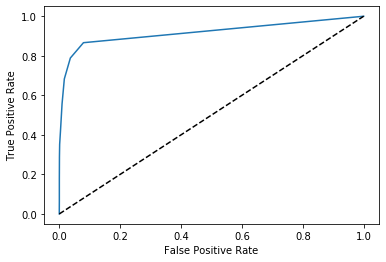

In [44]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [45]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.917713347342505


In [46]:
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.5025125628140702


# Model Tuning
- Grid SearchCV

In [47]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid)

# Fit the model
grid_search.fit(X, y)

/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Kainan/anac

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [48]:
# Print the optimal parameters
print(grid_search.best_params_)
#n_estimators hyperparameter controls the number of trees to use in the forest
#max_features hyperparameter controls the number features the random forest should consider when looking for the best split at decision tree.

{'max_features': 'auto'}


In [49]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

grid_search.best_params_

/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10}

In [58]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#import random
import numpy as np
# Create the hyperparameter distribution
param_dist = {"max_depth": [3, None],
              "max_features": list(np.arange(1,11, 1)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

In [59]:
# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist) # clf = RandomForestClassifier()

In [60]:
#Fit the model
random_search.fit(X, y)

/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=Non

In [61]:
# Print best parameters
print(random_search.best_params_)

{'max_features': 10, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


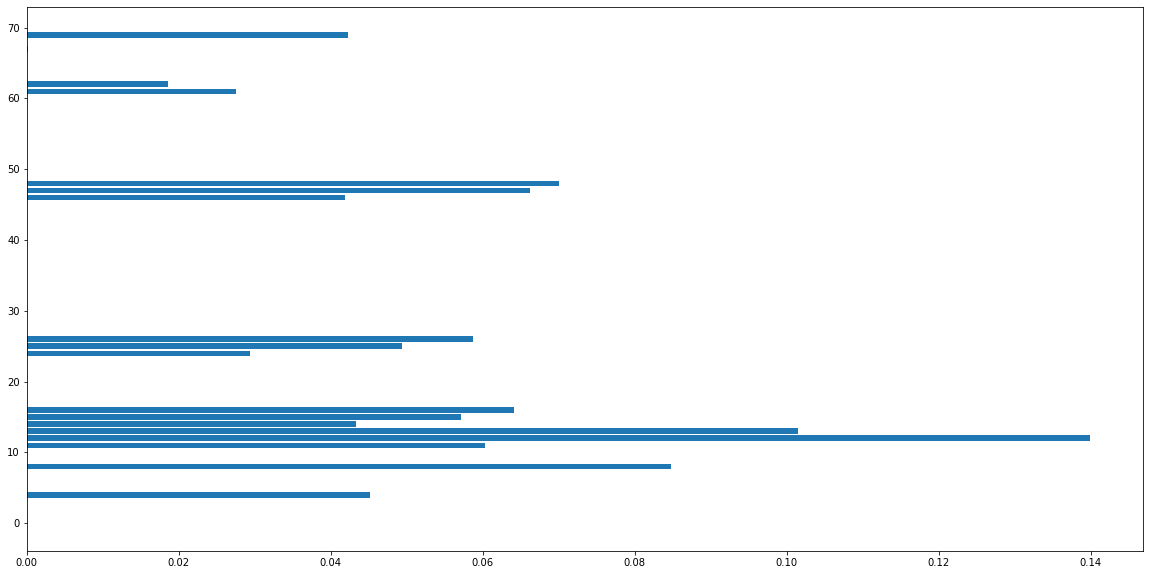

In [62]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.figure(figsize=(20,10))
plt.barh(range(X.shape[1]), importances)
plt.show()

<Figure size 432x288 with 0 Axes>

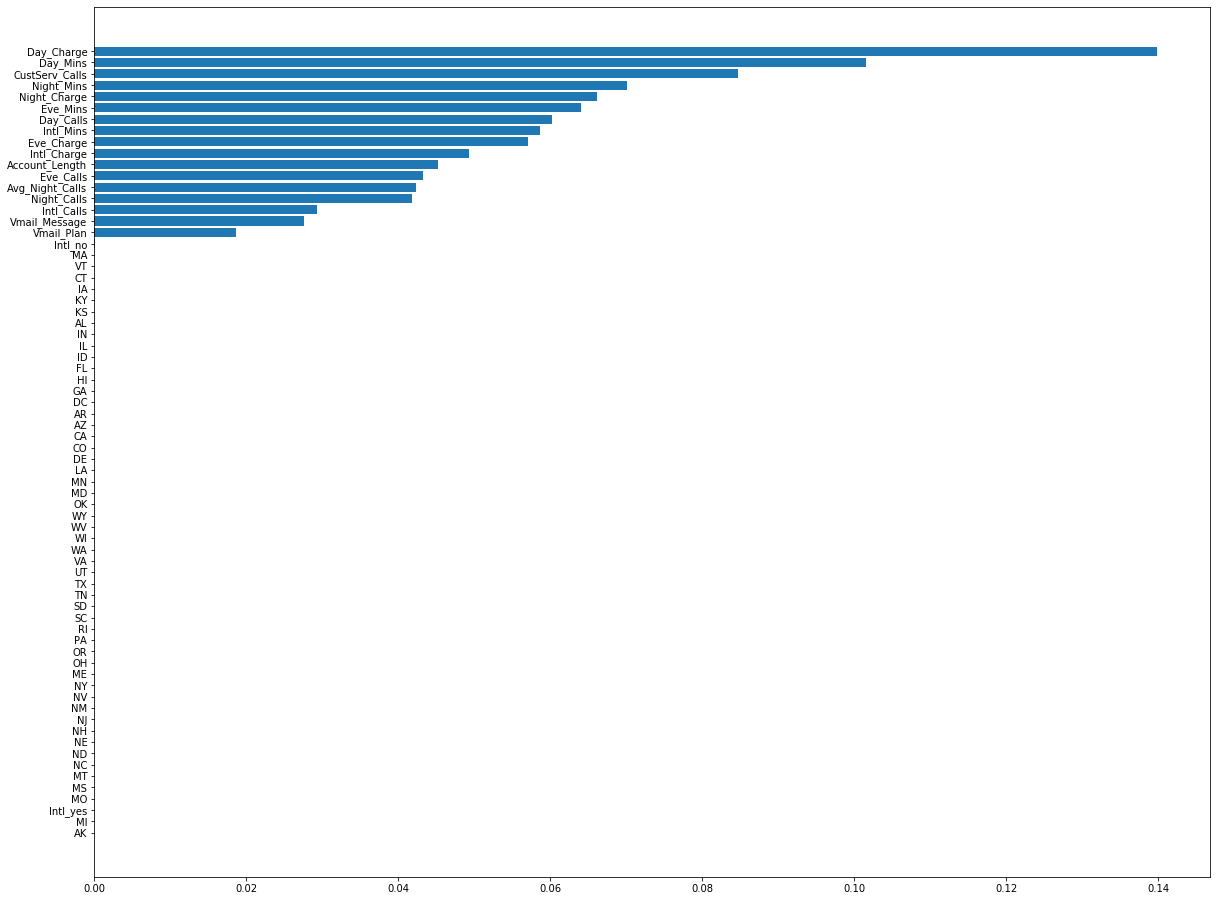

In [63]:

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()
plt.figure(figsize=(20,16))
# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

In [64]:
#Will this improve the churn model? 
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test, y_test))

/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9851666666666666


In [65]:
#other metrics
# Import f1_score
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the F1 score
print(f1_score(y_test, y_pred))


0.5314009661835748


/Users/Kainan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
